#### The data is found in:
https://console.cloud.google.com/storage/browser/quickdraw_dataset/full/numpy_bitmap

In [40]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.utils import shuffle
import tensorflow as tf
import math

#### Load Data

In [55]:
apple_data = np.load('../Datasets/doodles/full_numpy_bitmap_apple.npy')[:3000]
tower_data = np.load('../Datasets/doodles/full_numpy_bitmap_The Eiffel Tower.npy')[:3000]
banana_data = np.load('../Datasets/doodles/full_numpy_bitmap_banana.npy')[:3000]

apple_data = apple_data/255
tower_data = tower_data/255
banana_data = banana_data/255

#### Inspect Data

In [56]:
print("Class frecuency:")

print(apple_data.shape)
print(tower_data.shape)
print(banana_data.shape)

min_class_freq = min(apple_data.shape[0], tower_data.shape[0], banana_data.shape[0])

print("Minimum class frequency:")

print(min_class_freq)

Class frecuency:
(3000, 784)
(3000, 784)
(3000, 784)
Minimum class frequency:
3000


#### Prepare Dataset

In [57]:


test_size_per_class = int(min_class_freq * .2)
train_size_per_class = int(min_class_freq * .8)


# Preparing test set

testing_inputs = np.concatenate((apple_data[:test_size_per_class], tower_data[:test_size_per_class]))
testing_inputs = np.concatenate((testing_inputs, banana_data[:test_size_per_class]))

testing_outputs = np.array(
                    [0] * test_size_per_class + 
                    [1] * test_size_per_class + 
                    [2] * test_size_per_class 
                    )
testing_inputs, testing_outputs = shuffle(testing_inputs, testing_outputs)


# Preparing training set

training_inputs = np.concatenate((apple_data[ test_size_per_class:test_size_per_class + train_size_per_class ], tower_data[test_size_per_class:test_size_per_class + train_size_per_class ]))
training_inputs = np.concatenate((training_inputs, banana_data[test_size_per_class:test_size_per_class + train_size_per_class ]))


training_outputs = np.array(
                    [0] * train_size_per_class + 
                    [1] * train_size_per_class + 
                    [2] * train_size_per_class 
                    )

training_inputs, training_outputs = shuffle(training_inputs, training_outputs)

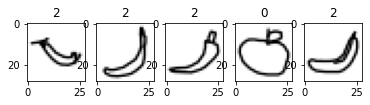

In [58]:
fig, axs = plt.subplots(1,5)

for i in range(len(axs)):
    axs[i].imshow(training_inputs[i].reshape((28,28)), cmap='Greys')
    axs[i].title.set_text(training_outputs[i])

#### Create Model

In [61]:
inputs = tf.keras.Input(shape=(784,))
x = tf.keras.layers.Dense(128)(inputs)
x = tf.keras.layers.Activation(tf.nn.relu)(x)
x = tf.keras.layers.Dense(100)(x)
x = tf.keras.layers.Activation(tf.nn.relu)(x)
x = tf.keras.layers.Dense(3)(x)
x = tf.keras.layers.Activation(tf.nn.softmax)(x)

model = tf.keras.Model(inputs=inputs, outputs=x, name="multilayer_perceptron")
model.summary()

Model: "multilayer_perceptron"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_15 (Dense)             (None, 128)               100480    
_________________________________________________________________
activation_15 (Activation)   (None, 128)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 100)               12900     
_________________________________________________________________
activation_16 (Activation)   (None, 100)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 3)                 303       
_________________________________________________________________
activation_17 (Activation)   (None, 3)       

### Training the model

In [62]:
batch_size = 50
model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy']
             )
model.fit(training_inputs, 
          training_outputs, 
          validation_data=(testing_inputs,testing_outputs), 
          batch_size=batch_size, 
          steps_per_epoch=train_size_per_class*3//batch_size, 
          epochs=5
         )

Epoch 1/5
144/144 [==============================] - 1s 3ms/step - loss: 0.3650 - accuracy: 0.8684 - val_loss: 0.1231 - val_accuracy: 0.9589
Epoch 2/5
144/144 [==============================] - 0s 2ms/step - loss: 0.1058 - accuracy: 0.9668 - val_loss: 0.0943 - val_accuracy: 0.9678
Epoch 3/5
144/144 [==============================] - 0s 2ms/step - loss: 0.0539 - accuracy: 0.9835 - val_loss: 0.0903 - val_accuracy: 0.9683
Epoch 4/5
144/144 [==============================] - 0s 2ms/step - loss: 0.0410 - accuracy: 0.9875 - val_loss: 0.0865 - val_accuracy: 0.9711
Epoch 5/5
144/144 [==============================] - 0s 2ms/step - loss: 0.0175 - accuracy: 0.9950 - val_loss: 0.0845 - val_accuracy: 0.9711
